In [1]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [4]:
diabetes.data.shape

(442, 10)

In [20]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [31]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [22]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 체질량 지수 : bmi

(體質量指數, Body Mass Index, BMI)는 인간의 비만도를 나타내는 지수로, 체중과 키의 관계로 계산된다.

키가 t 미터, 체중이 w 킬로그램일 때, BMI는 다음과 같다. (키의 단위가 센티미터가 아닌 미터임에 유의해야 한다.)

In [26]:
h = 175; w = 70

In [29]:
70 / (175**2)

0.002285714285714286

### 평균 혈압 : bp 

Average blood pressure

In [23]:
import pandas as pd

In [24]:
df_di = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [32]:
df_di["Target"] = diabetes.target

In [33]:
df_di.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [34]:
df_di.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


### seaborn의 pairplot 명령으로 각 데이터의 분포와 데이터들간의 상관관계를 파악한다.

In [35]:
import seaborn as sns

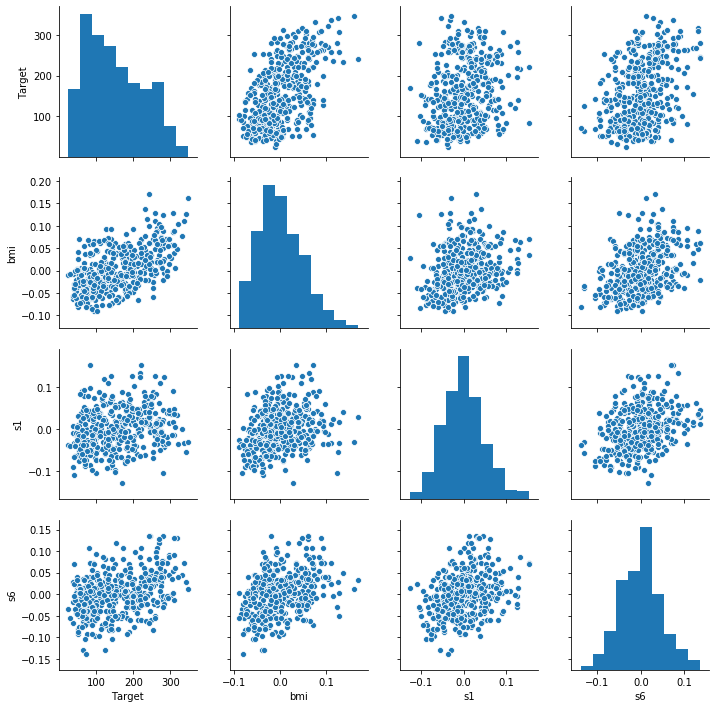

In [37]:
cols = ["Target", "bmi", "s1", "s6"]
sns.pairplot(df_di[cols])
plt.show()

## 3차원으로 만들기

In [5]:
diabetes_1 = diabetes.data[:, np.newaxis]

In [6]:
diabetes_1.shape

(442, 1, 10)

In [7]:
(diabetes_1[:, 0, 2] == diabetes.data[:, 2]).sum()

442

In [8]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [9]:
diabetes_X.shape

(442, 1)

In [10]:
diabetes_2 = diabetes.data[:,2]

In [16]:
diabetes_2.shape

(442,)

In [18]:
diabetes_2[:, np.newaxis].shape

(442, 1)

In [19]:
(diabetes_X == diabetes_2[:,np.newaxis]).sum()

442

## 훈련과 테스트 데이터 세트 분리

In [12]:

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


## 회기분석 알고리즘 처리

In [13]:


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))



Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


## 그래프 그리기

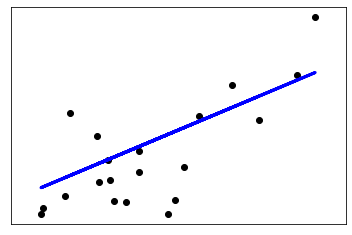

In [14]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()